<a href="https://colab.research.google.com/github/Dong2Yo/DATA3550_1232/blob/main/Lectures/Chp10_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 10**   Inheritance

* To learn about inheritance
* To implement subclasses that inherit and override superclass methods
* To understand the concept of polymorphism

Objects from related classes usually share common characteristics and behavior.

For example, cars, buses, and motorcycles all have wheels, require a fuel source, and can transport people.

In this chapter, you will learn how the notion of inheritance expresses the relationship between specialized and general classes.

By using inheritance, you will be able to share code between classes and provide services that can be used by multiple classes.

In [ ]:
# cat
class Cat:
  def __init__(self, name, age):
    self._name = name
    self._age = age

  def speak(self) :
    return "Meow"

In [ ]:
tom = Cat("Tom", 10)
print(f'{tom._name} is {tom._age}, he goes {tom.speak()}, {tom.speak()}!')

In [ ]:
class Dog:
  def __init__(self, name, age):
    self._name = name
    self._age = age

  def speak(self) :
    return "Woof"

In [ ]:
tom = Dog("Tom", 10)
print(f'{tom._name} is {tom._age}, he goes {tom.speak()}, {tom.speak()}!')

# **10.1 Inheritance Hierarchies**

**A subclass inherits data and behavior from a superclass.**

In object-oriented design, inheritance is a relationship between a more general class (called the superclass) and a more specialized class (called the subclass).

The subclass inherits data and behavior from the superclass.

For example, consider the relationships between different kinds of vehicles depicted as follows:

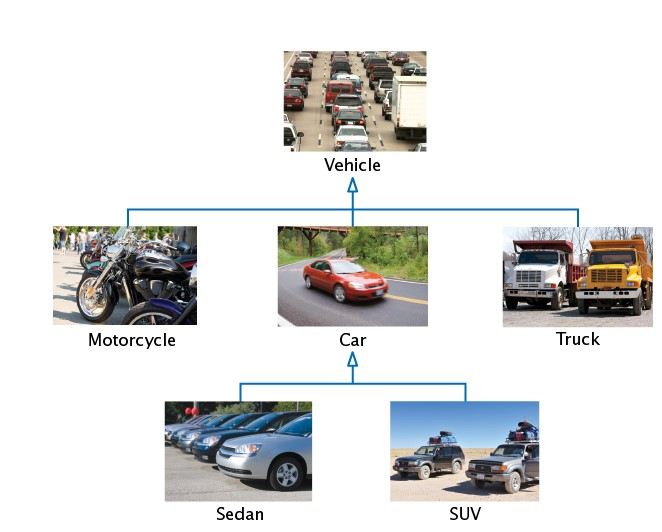

Every car is a vehicle. Cars share the common traits of all vehicles, such as the ability to transport people from one place to another.

We say that the class Car inherits from the class Vehicle. In this relationship, the Vehicle class is the ***superclass*** and the Car class is the ***subclass***.

**You can always use a subclass object in place of a superclass object.**

In [ ]:
class Animal :
  def __init__(self, name, age):
    self._name = name
    self._age = age

  def show(self) :
    print(f'I am {self._name}, and I am {self._age}.')

  def speak(self) :
    return "I do not know how to speak."

class Cat(Animal) :
  def __init__(self, name, age, color) :
    super().__init__(name, age)
    self._color = color


  def speak(self):
    return "Meow"

  def show(self):
    print(f'I am {self._name}, and I am {self._age}, and I am {self._color}.')


class Dog(Animal) :
  def speak(self):
    return "Woof"

class Fish(Animal):
  pass

In [ ]:
c = Cat("Tom", 2, "black")
c.show()
c.speak()

In [ ]:
f = Fish("Nemo", 45)
f.speak()

In [ ]:
a = Animal("Rex", 8)
a.show()
a.speak()

Python 3's f-Strings: An Improved String Formatting Syntax (Guide)
https://realpython.com/python-f-strings/

In [ ]:
# speak method in the super class


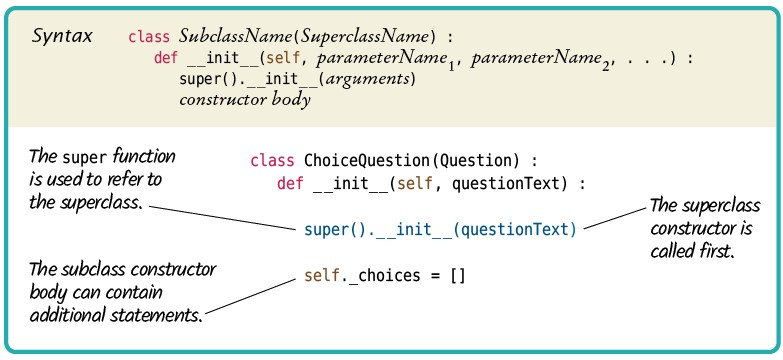

In [ ]:
# the subclass has more init methods



**Ex.** We will consider a simple hierarchy of classes representing questions. Most likely, you have taken computer-graded quizzes. A quiz consists of questions, and there are different kinds of questions:

			•Fill-in-the-blank
			•Choice (single or multiple)
			•Numeric (where an approximate answer is ok; e.g., 1.33 when the actual answer is 4/3)
			•Free response

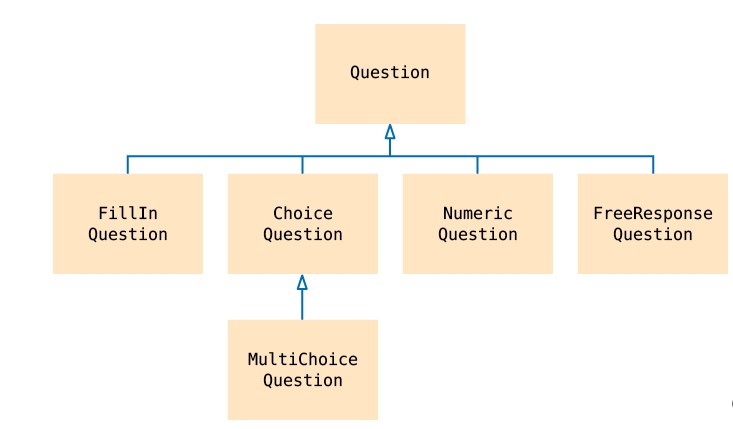

At the root of this hierarchy is the **Question type**.

A question can display its text, and it can check whether a given response is a correct answer.

This question class is very basic. It does not handle multiple-choice questions, numeric questions, and so on.

## Programming Tip 10.1

### Use a Single Class for Variation in Values, Inheritance for Variation in Behavior

**The purpose of inheritance is to model objects with different behavior.**

When students first learn about inheritance, they have a tendency to overuse it, creating multiple classes even though the variation could be expressed with a simple instance variable.



## The Cosmic Superclass: object

**In Python, every class that is declared without an explicit superclass automatically extends the class object.**

That is, the class object is the direct or indirect superclass of every class in Python.

The object class defines several very general methods, including the __repr__ method.

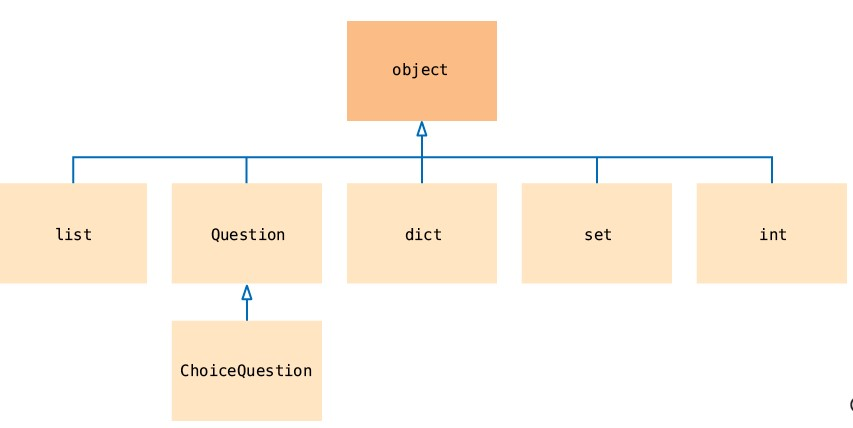

**The __repr__ method returns a string representation for each object.**

By default, this includes the name of the class from which the object was created and the name of the module in which the class was defined.


As you learned before, the __repr__ method can be overridden in a user-defined class to provide a more meaningful representation of the object.


**The __repr__ method is often overridden in subclasses for use in debugging.**



In [ ]:
class Question :
  def __init__(self) :
    self._text = ""
    self._answer = ""

  def setText(self, question_text):
    self.text = question_text

  def setAnswer(self, correct_answer):
    self._answer = correct_answer

  def checkAnswer(self, response):
    return response == self._answer

  def display(self) :
    print(self.text)


In [ ]:
q = Question()


In [ ]:
q.setText("Who is the inventor of Python?")
q.setAnswer("Guido van Rossum")
q.display()
response = input("What is your answer? ")
q.checkAnswer(response)

# **10.2 Implementing Subclasses**

Suppose you want to write a program that handles questions such as the following:

	In which country was the inventor of Python born?
			1. Australia
			2. Canada
			3. Netherlands
			4. United States

You could write a ChoiceQuestion class from scratch, with methods to set up the question, display it, and check the answer.

But you don’t have to. Instead, use inheritance and implement ChoiceQuestion as a subclass of the Question class.

This will allow the ChoiceQuestion subclass to inherit the characteristics and behavior of the Question class that are shared by both.

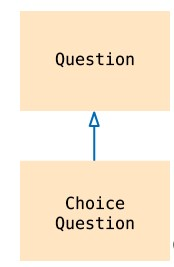

In [ ]:
class Question :
  def __init__(self) :
    self._text = ""
    self._answer = ""

  def setText(self, question_text):
    self.text = question_text

  def setAnswer(self, correct_answer):
    self._answer = correct_answer

  def checkAnswer(self, response):
    return response == self._answer

  def display(self) :
    print(self.text)

In [ ]:
class ChoiceQuestion(Question) :
  def __init__(self):
    super().__init__()
    self._choices = []

  def addChoice(self, choice, correct):
    self._choices.append(choice)
    if correct :
      choiceString = str(len(self._choices))
      self.setAnswer(choiceString)

  def display(self):
    super().display()

    for i in range(len(self._choices)) :
      choiceNumber = i + 1
      print("%d: %s" % (choiceNumber, self._choices[i]))

In [ ]:
q1 = ChoiceQuestion()

In [ ]:
q1.setText("In which country was the inventor of Python born? ")
q1.addChoice("Australia", False)
q1.addChoice("China", False)
q1.addChoice("Netherland", True)
q1.addChoice("USA", False)
q1.addChoice("Japan", False)
q1.addChoice("Isreal", False)
q1.addChoice("UK", False)
q1.display()
response = input("What is your answer?")
print(q1.checkAnswer(response))

**In Python, you form a subclass by specifying what makes the subclass different from its superclass.**

Subclass objects automatically have the instance variables that are declared in the superclass. You declare only instance variables that are not part of the superclass objects.

**A subclass can override a superclass method by providing a new implementation.**


The subclass inherits all methods from the superclass. You define any methods that are new to the subclass, and change the implementation of inherited methods if the inherited behavior is not appropriate. When you supply a new implementation for an inherited method, you override the method.

**Modify the checkAnswer method of the Question class so that it does not take into account different spaces or upper/lowercase characters**. For example, the response "GUIDO van Rossum" should match an answer of "Guido van Rossum".

**Add a method addText to the Question superclass and provide a different implementation of ChoiceQuestion that calls addText rather than storing a list of choices.**

# **Syntax 10.1 Subclass Definition**

**A class name inside parentheses in the class header indicates that a class inherits from a superclass.**

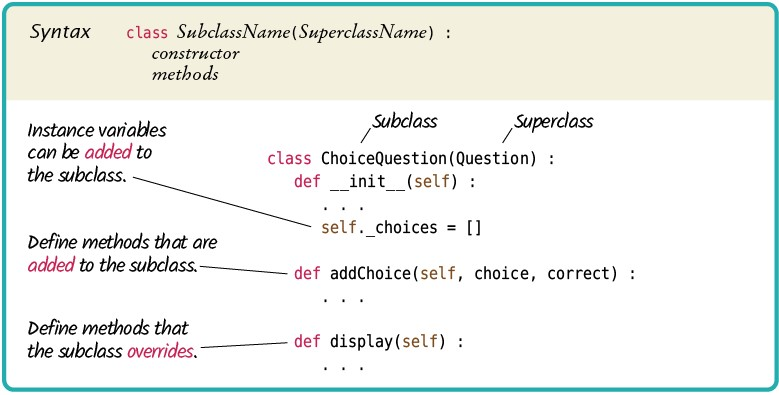

The figure shows the layout of a ChoiceQuestion object. It has the _text and _answer instance variables that are declared in the Question superclass, and it adds an additional instance variable, _choices.

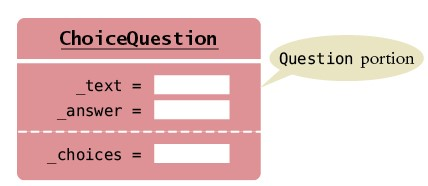

The addChoice method is specific to the ChoiceQuestion class.

You can only apply it to ChoiceQuestion objects, not general Question objects.

In contrast, the display method is a method that already exists in the superclass. The subclass overrides this method, so that the choices can be properly displayed.

All other methods of the Question class are automatically inherited by the ChoiceQuestion class.   

You can call the inherited methods on a subclass object:

            choiceQuestion.setAnswer("2")

However, the instance variables of the superclass are private to that class. Only the methods of the superclass should access its instance variables.

Note that while Python does not provide a way to protect the instance variables of a superclass, good programming practice dictates that we should enforce this rule ourselves.

In particular, the ChoiceQuestion methods should not directly access the instance variable _answer. These methods must use the public interface of the Question class to access its private data, just like every other function or method.

To illustrate this point, let’s implement the addChoice method.

The method has two arguments: the choice to be added (which is appended to the list of choices), and a Boolean value to indicate whether this choice is correct. For example,

            question.addChoice("Canada", True)

The first argument is added to the _choices instance variable. If the second argument is True, then the _answer instance variable becomes the number of the current choice.

For example, if len(self._choices) is 2, then _answer is set to the string "2".

            def addChoice(self, choice, correct) :
			   self._choices.append(choice)
			   if correct :
			      # Convert the length of the list to a string.
			      choiceString = str(len(self._choices))
			      self.setAnswer(choiceString)

You should not access the _answer variable in the superclass. Fortunately, the Question class has a setAnswer method. You can call that method. On which object? The question that you are currently modifying—that is, the object on which the addChoice method was called.

As you learned in the previous modules, a reference to the object on which a method is called is automatically passed to the self parameter variable of the method. Thus, to call the setAnswer method on that object, use the self reference:

            self.setAnswer(choiceString)

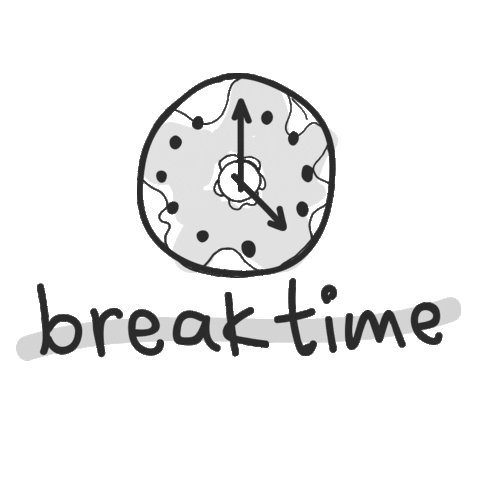

# **10.3 Calling the Superclass Constructor**

**The superclass is responsible for defining its own instance variables.**

Consider the process of constructing a subclass object.

A subclass constructor can only define the instance variables of the subclass. But the superclass instance variables also need to be defined.

**The subclass constructor must explicitly call the superclass constructor.**

The superclass is responsible for defining its own instance variables.

Because this is done within its constructor, the constructor of the subclass must explicitly call the superclass constructor.

To call the superclass constructor, you use the __init__ special method. But the constructors of both classes have the same name. To distinguish between the constructor of the superclass and that of the subclass, you must use the super function in place of the self reference when calling the constructor:

            class ChoiceQuestion(Question) :
			   def __init__(self) :
			      super().__init__()
			      self._choices = []

**Use the super function to call the superclass constructor.**

The superclass constructor should be called before the subclass defines its own instance variables. Note that the self reference must still be used to define the instance variables of the subclass.

If a superclass constructor requires arguments, you must provide those as arguments to the __init__ method.

For example, suppose the constructor of the Question superclass accepted an argument for setting the question text. Here is how a subclass constructor would call that superclass constructor:

            class ChoiceQuestion(Question) :
			   def __init__(self, questionText) :
			      super().__init__(questionText)
			      self._choices = []

# **Syntax 10.2 Subclass Constructor**

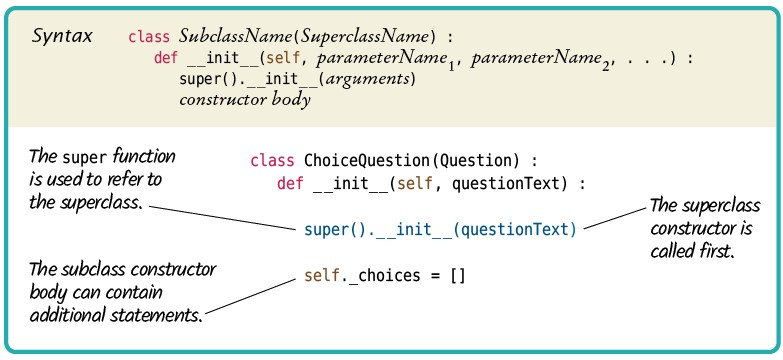

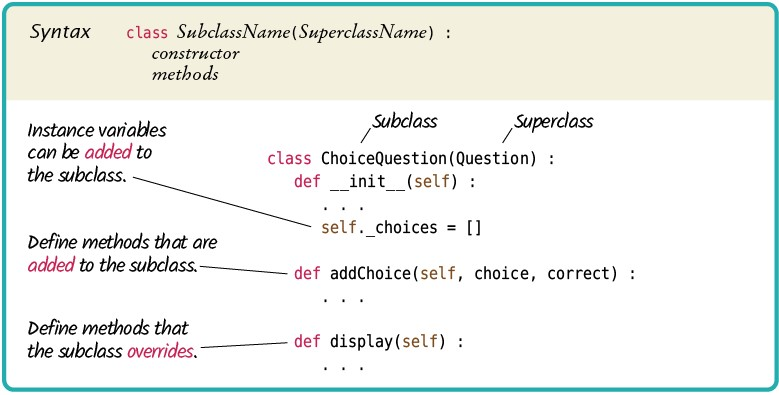

# **repr() Method**

The repr() method returns a string containing a printable representation of an object. The repr() function calls the underlying __repr__() function of the object.

In [ ]:
repr(object)

In [ ]:
repr(10)

'10'

In [ ]:
repr("This is the world.")

"'This is the world.'"

In [ ]:
class Human:
  name = ""


hum = Human()
repr(hum)

'<__main__.Human object at 0x7f9b365b6290>'

In [ ]:
class Human:
  name = ""
  def __repr__(self):
    return "Mankind"

hum = Human()
repr(hum)

'Mankind'

# **Review 1**


**Single Underscore**

In a class, names with a leading underscore indicate to other programmers that the attribute or method is intended to be be used inside that class. However, **Privacy is NOT enforced**in any way. Using leading underscores for functions in a module indicates it should not be imported from somewhere else.

In [ ]:
class Person:
  def _getInfo(self):
    return "Person"

  def printPerson(self):
    print(self._getInfo())

class Student(Person):
  def _getInfo(self):
    return "Student"




In [ ]:
Person().printPerson()
Student().printPerson()

Person
Student


In [ ]:
class Person:
  def __getInfo(self):
    return "Person"

  def printPerson(self):
    print(self.__getInfo())

class Student(Person):
  def __getInfo(self):
    return "Student"

In [ ]:
Person().printPerson()
Student().printPerson()

Person
Person


**Double Underscore**

From the Python docs:

Any identifier of the form __spam (at least two leading underscores, at most one trailing underscore) is textually replaced with _classname__spam, where classname is the current class name with leading underscore(s) stripped. This mangling is done without regard to the syntactic position of the identifier,**so it can be used to define class-private instance and class variables, methods, variables stored in globals, and even variables stored in instances. private to this class on instances of other classes.**


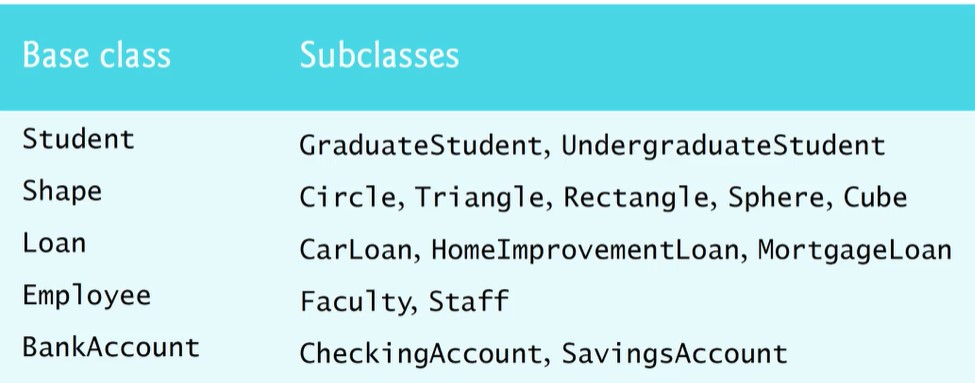

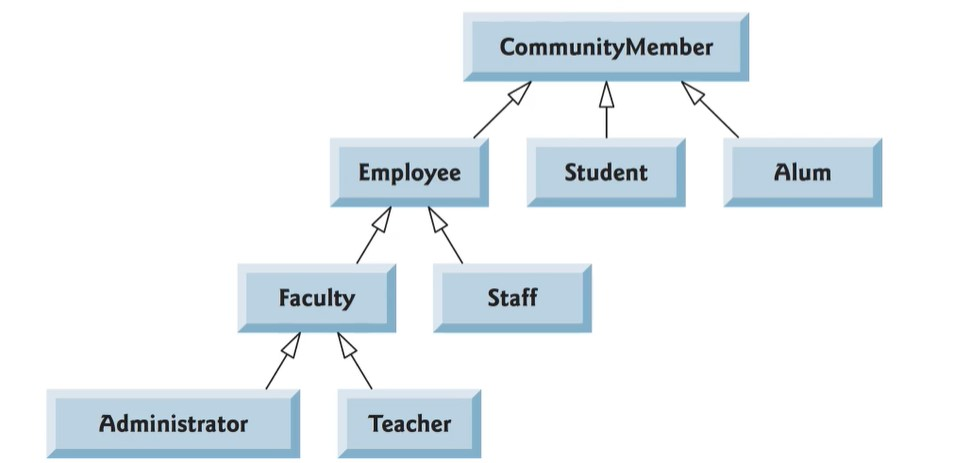

Python 3's f-Strings: An Improved String Formatting Syntax (Guide)
https://realpython.com/python-f-strings/

In [ ]:
#What about the HR sector? Employees - managers, workers, contracts

class Employee :
  number_of_people = 0

  def __init__(self, name):
    self._name = name

In [ ]:
e1 = Employee("Mary")
e2 = Employee("Mike")


In [ ]:
print(e1.number_of_people)

0


In [ ]:
print(Employee.number_of_people)

0


In [ ]:
Employee.number_of_people = 10


In [ ]:
print(e1.number_of_people)

10


In [ ]:
class Employee :
  number_of_people = 0

  def __init__(self, name):
    self._name = name
    Employee.number_of_people += 1

In [ ]:
e1 = Employee("Mary")
print(e1.number_of_people)
e2 = Employee("Mike")
print(e2.number_of_people)

1
2


In [ ]:
class Employee :
  number_of_people = 0

  def __init__(self, name):
    self._name = name
    Employee.add_employee()

  @classmethod
  def add_employee(cls):
    cls.number_of_people += 1

  @classmethod
  def total_employee(cls):
    return  cls.number_of_people

In [ ]:
t1 = Employee("Mary")
t2 = Employee("Mike")
print(Employee.total_employee())

4


# **Review 2**

In [ ]:
#static method with class - library


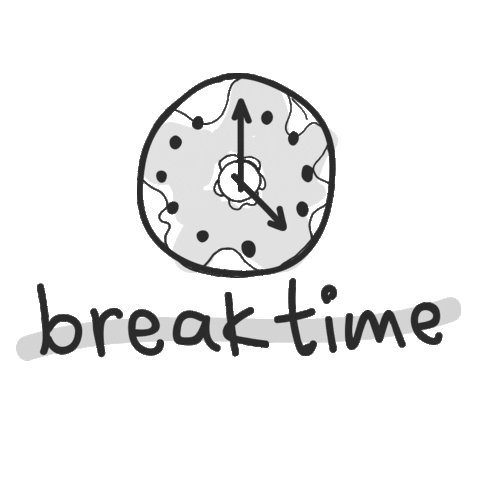

# **10.4 Overriding Methods**

The subclass inherits the methods in the superclass. If you are not satisfied with the behavior of an inherited method, you **override** it by specifying a new implementation in the subclass.

**An overriding method can extend or replace the functionality of the superclass method.**

Consider the display method of the ChoiceQuestion class.

It overrides the superclass display method in order to show the choices for the answer. This method extends the functionality of the superclass version.

This means that the subclass method carries out the action of the superclass method (in our case, displaying the question text), and it also does some additional work (in our case, displaying the choices).

In other cases, a subclass method replaces the functionality of a superclass method, implementing an entirely different behavior.

Let us turn to the implementation of the display method of the ChoiceQuestion class. The method needs to

            • Display the question text.
			• Display the answer choices.

The second part is easy because the answer choices are an instance variable of the subclass.

           class ChoiceQuestion(Question) :
			   . . .
			   def display(self) :
			      # Display the question text.
			   . . .
			  
                  # Display the answer choices.
			      for i in range(len(self._choices)) :
			         choiceNumber = i + 1
			         print("%d: %s" % (choiceNumber, self._choices[i]))
			   
But how do you get the question text? You can’t access the text variable of the superclass directly because it is private.

Instead, you can call the display method of the superclass, using the super function:

            def display(self) :
			   # Display the question text.
			   super().display()   # OK
			   # Display the answer choices.
			   . . .
If you use the self reference instead of the super function, then the method will not work as intended.

            def display(self) :
			   # Display the question text.
			   self.display()   # Error—invokes display() of ChoiceQuestion.
			   . . .
Because the self parameter references an object of type ChoiceQuestion, and there is a method named display in the ChoiceQuestion class, that method will be called—but that is the method you are currently writing! Written that way, the method would call itself over and over.

Here is a program that lets you take a quiz consisting of two ChoiceQuestion objects. We construct both objects and pass each, in turn, to a function presentQuestion. That function displays the question to the user and checks whether the user response is correct.

In [ ]:
##
#  This module defines a class that models exam questions.
#

## A question with a text and an answer.


In [ ]:
#
#  This module defines a class that extends the base Question class.


# Building an Inheritance Hierarchy and Introducing Polymorphism

https://docs.python.org/3/reference/datamodel.html

## **What is Polymorphism?**

The literal meaning of polymorphism is the condition of occurrence in different forms.

Polymorphism is a very important concept in programming. It refers to the use of a single type entity (method, operator or object) to represent different types in different scenarios.

In [ ]:
# Example 1: Polymorphism in addition operator


In [ ]:
num1 = 1
num2 = 2
print(num1 + num2)

3


In [ ]:
str1 = "DATA"
str2 = "3550"
print(str1 + str2)

DATA3550


In [ ]:
# Example 2: Function Polymorphism


In [ ]:
print(len("program"))

7


In [ ]:
print(len(["Python", "C", "R"]))

3


In [ ]:
print(len({"Name": "John", "Age": 65}))

2


In [ ]:
# Example 3: Polymorphism in Class Methods

In [ ]:
class Cat :
  def __init__(self, name, age):
    self._name = name
    self._age = age

  def info(self):
    print(f'I am a cat. My name is {self._name}. And I am {self._age} years old.')

  def sound(self):
    print("Meow")


class Dog :
  def __init__(self, name, age):
    self._name = name
    self._age = age

  def info(self):
    print(f'I am a dog. My name is {self._name}. And I am {self._age} years old.')

  def sound(self):
    print("Woof")

In [ ]:
cat1 = Cat("Kitty", 3.5)
dog1 = Dog("Rex", 4)

for animal in (cat1,dog1):
  animal.sound()
  animal.info()



Meow
I am a cat. My name is Kitty. And I am 3.5 years old.
Woof
I am a dog. My name is Rex. And I am 4 years old.


In [ ]:
# Polymorphism and Inheritance
## Example 4: Method Overriding

In [ ]:
class Animal:


**Note: Method Overloading**, a way to create multiple methods with the same name but different arguments, is not possible in Python.

## **Example 1 - Employee Superclass**

An employee has a name and a mechanism for computing weekly pay.

In [ ]:
 class Employee :
   def __init__(self, name) :
     self._name = name

   def getName(self):
     return self._name

   def weeklyPay(self, hoursWorked) :
    return 100


In [ ]:
e1 = Employee("Mary")
e1.weeklyPay(30)

100

In [ ]:
e1.weeklyPay(3400)

100

## **Hourly Employee Class**

In [ ]:
## An hourly employee is paid for every hour worked.
#


In [ ]:
class HourlyEmployee(Employee):
  def __init__(self, name, wage):
   super().__init__(name)
   self._wage = wage

  def weeklyPay(self, hoursWorked) :
    pay = self._wage * hoursWorked
    return pay

In [ ]:
e2 = HourlyEmployee("Tom", 30)
e2.weeklyPay(35)

1050

## **Salaried Employee Class**

In [ ]:

## A salaried employee is paid the same amount independent of the hours worked.
#


In [ ]:
class SalariedEmployee(Employee):
  def __init__(self, name, salary):
   super().__init__(name)
   self._annualsalary = salary

  def weeklyPay(self, hoursWorked) :
    WEEKS_PER_YEAR = 52
    pay = self._annualsalary / WEEKS_PER_YEAR
    return pay

In [ ]:
e3 = SalariedEmployee("Mark", 100000)
e3.weeklyPay(60)

1923.076923076923

## **Manager Class**

In [ ]:
## A manager is a salaried employee who also receives a bonus.
#


In [ ]:
class Manager(SalariedEmployee):
  def __init__(self, name, salary, bonus):
   super().__init__(name, salary)
   self._weeklybonus = bonus

  def weeklyPay(self, hoursWorked) :
    return super().weeklyPay(hoursWorked) + self._weeklybonus

In [ ]:
e4 = Manager("Alice", 100000, 60)
e4.weeklyPay(40)

1983.076923076923

## **Demo**

In [ ]:
staff = []
staff.append(HourlyEmployee("Morgan, Harry", 30.0))
staff.append(SalariedEmployee("Lin, Sally", 52000.0))
staff.append(Manager("Smith, Mary", 104000.0, 50.0))

In [ ]:
for employee in staff :
  hours = int(input("Hours worked by  " + employee.getName() + ": "))
  income = employee.weeklyPay(hours)
  print(income)

Hours worked by  Morgan, Harry: 30
900.0
Hours worked by  Lin, Sally: 30
1000.0
Hours worked by  Smith, Mary: 30
2050.0


Method calls are always determined at run time based on the type of the actual object. This is called **dynamic method lookup**. Dynamic method lookup allows us to treat objects of different classes in a uniform way. This feature is called **polymorphism**. We ask multiple objects to carry out a task, and each object does so in its own way.

##  **Example 2 - Commission Employee Class**

In [ ]:
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""

    def __init__(self, first_name, last_name,gross_sales, commission_rate):
        self._first_name = first_name
        self._last_name = last_name
        self.gross_sales = gross_sales  # validate via property
        self.commission_rate = commission_rate  # validate via property

    def first_name(self):
        return self._first_name

    def last_name(self):
        return self._last_name

    def gross_sales(self):
        return self._gross_sales

    def gross_sales(self, sales):

        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')

        self._gross_sales = sales

    def commission_rate(self):
        return self._commission_rate


    def commission_rate(self, rate):

        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError(
               'Interest rate must be greater than 0 and less than 1')

        self._commission_rate = rate

    def earnings(self):

        return self.gross_sales * self.commission_rate

    def __repr__(self):

        return (f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')


## **Salaried Commission Employee Class**

we're going to take a look at the second class in our class hierarchy, the SalariedCommissionEmployee class.
And **a salaried commission employee is a commission employee who also gets paid a base salary.**

Now, because a salaried employee has a lot of commonality with class CommissionEmployee, what we can do is simply **inherit class CommissionEmployee's set of capabilities and just add on in our SalariedCommissionEmployee class the additional pieces of information and functionality that we need**.

In [ ]:
from decimal import Decimal

class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus
    commission based on gross sales."""

    def __init__(self, first_name, last_name, gross_sales, commission_rate, base_salary):
        super().__init__(first_name, last_name, gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property

    def base_salary(self):
        return self._base_salary

    def base_salary(self, salary):
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')

        self._base_salary = salary

    def earnings(self):
        return super().earnings() + self.base_salary

    def __repr__(self):
        return ('Salaried' + super().__repr__() +
            f'\nbase salary: {self.base_salary:.2f}')



**The earning method is overriden here.**

## **Demo**

# **Duck-Typing**

https://docs.python.org/3/glossary.html#term-duck-typing

duck-typing

A programming style which does not look at an object’s type to determine if it has the right interface; instead, the method or attribute is simply called or used (“If it looks like a duck and quacks like a duck, it must be a duck.”) By emphasizing interfaces rather than specific types, well-designed code improves its flexibility by allowing polymorphic substitution. Duck-typing avoids tests using type() or isinstance(). (Note, however, that duck-typing can be complemented with abstract base classes.) Instead, it typically employs hasattr() tests or EAFP programming.

In [ ]:
class Duck:

  def weeklyPay(hoursWorked) :
    return '1000000000.00'

  def __repr__(self):
    return "If it looks like a duck and quacks like a duck, it must be a duck."

In [ ]:
d = Duck

So, python is extremely flexible when it comes to processing objects of different types.

You don't necessarily need to relate types by a class hierarchy in order to get the style of polymorphic processing that we are demonstrating in this for-loop.

And in fact, **python often takes advantage of the fact that multiple different types of objects have the same methods, or properties, or attributes regardless of whether they are related by a class hierarchy.**

# **10.5 Polymorphism**

In this section, you will learn how to **use inheritance for processing objects of different types in the same program.**

Consider our first sample program. It presented two Question objects to the user. The second sample program presented two ChoiceQuestion objects. Can we write a program that shows a mixture of both question types?

With inheritance, this goal is very easy to realize.

In order to present a question to the user, we need not know the exact type of the question. We just display the question and check whether the user supplied the correct answer.

The Question superclass has methods for this purpose. Therefore, we can define the presentQuestion function to expect a Question type object:

            def presentQuestion(q) :
			   q.display()
			   response = input("Your answer: ")
			   print(q.checkAnswer(response))

That is, we can call any method on the q parameter variable that is defined by the Question class.

**A subclass reference can be used when a superclass reference is expected.**

We can substitute a subclass object whenever a superclass object is expected:

			second = ChoiceQuestion()
			presentQuestion(second)   # OK to pass a ChoiceQuestion

But you cannot substitute a superclass object when a subclass object is expected.

For example, suppose we define the function addAllChoices to add the strings from a list to a ChoiceQuestion object as the choices from which to choose:

            def addAllChoices(q, choices, correct) :
			   for i in range(len(choices)) :
			      if i == correct :
			         q.addChoice(choices[i], True)
			      else :
			         q.addChoice(choices[i], False)

This function works correctly if we pass a ChoiceQuestion object as the first argument:
			text = "In which year was Python first released?"
			answers = ["1991", "1995", "1998", "2000"]
			correct = 1
			  
			first = ChoiceQuestion()
			first.setText(text)
			addAllChoices(first, answers, correct)

When the addAllChoices function executes, the q parameter variable refers to a ChoiceQuestion object. But if we create a Question object and pass it to the addAllChoices function instead:

            . . .
			first = Question()
			first.setText(text)
			addAllChoices(first, answers, correct)

an AttributeError exception will be raised. That is as it should be. The q parameter variable refers to a Question object, but the Question class does not define the addChoice method. You cannot invoke a method on an object that has not been defined by that object’s class.

Now let’s have a closer look inside the presentQuestion function. It starts with the call

            q.display()   # Does it call Question.display or ChoiceQuestion.display?

Which display method is called? If you look at the output following the program below, you will see that the method called depends on the contents of the parameter variable q.

In the first case, q refers to a Question object, so the Question.display method is called.

But in the second case, q refers to a ChoiceQuestion, so the ChoiceQuestion.display method is called, showing the list of choices.

Method calls are always determined at run time based on the type of the actual object. This is called **dynamic method lookup**.

Dynamic method lookup allows us to treat objects of different classes in a uniform way. This feature is called **polymorphism**. We ask multiple objects to carry out a task, and each object does so in its own way.


**Polymorphism (“having multiple shapes”) allows us to manipulate objects that share a set of tasks, even though the tasks are executed in different ways.**

Polymorphism makes programs easily extensible.

Suppose we want to have a new kind of question for calculations where we are willing to accept an approximate answer.

All we need to do is to define a new class NumericQuestion that extends Question, with its own checkAnswer method.

Then we can call the presentQuestion function with a mixture of plain questions, choice questions, and numeric questions.

The presentQuestion function need not be changed at all! Thanks to dynamic method lookup, calls to the display and checkAnswer methods automatically select the method of the correct class.

# **10.6 Application: A Geometric Shape Class Hierarchy**

# **Summary**


#### **Explain the notions of inheritance, superclass, and subclass.**

• A subclass inherits data and behavior from a superclass.

• You can always use a subclass object in place of a superclass object.

#### **Implement subclasses in Python.**

• A subclass inherits all methods that it does not override.

• A subclass can override a superclass method by providing a new implementation.

• A class name inside parentheses in the class header indicates that a class inherits from a superclass.

#### **Understand how and when to call a superclass constructor.**

• The superclass is responsible for defining its own instance variables.

• The subclass constructor must explicitly call the superclass constructor.
            
• Use the super function to call the superclass constructor.

#### **Implement methods that override methods from a superclass.**

• An overriding method can extend or replace the functionality of the superclass method.

• Use the super function to call a superclass method.

#### **Use polymorphism for processing objects of related types.**

• A subclass reference can be used when a superclass reference is expected.

• Polymorphism (“having multiple shapes”) allows us to manipulate objects that share a set of tasks, even though the tasks are executed in different ways.

• An abstract method is a method whose implementation is not specified.

#### **Use inheritance for designing a hierarchy of shapes.**

• The GeometricShape class provides methods that are common to all shapes.

• Each subclass of GeometricShape must override the draw method.

• A shape class constructor must call super to initialize the coordinates of its upper-left corner.
            
• Each shape subclass must override the methods for computing the width and height.
            
• A Group contains shapes that are drawn and moved together.